In [20]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/student-mat.csv', sep =';', encoding = 'utf-8')

## 중심경향과 변동성 지수

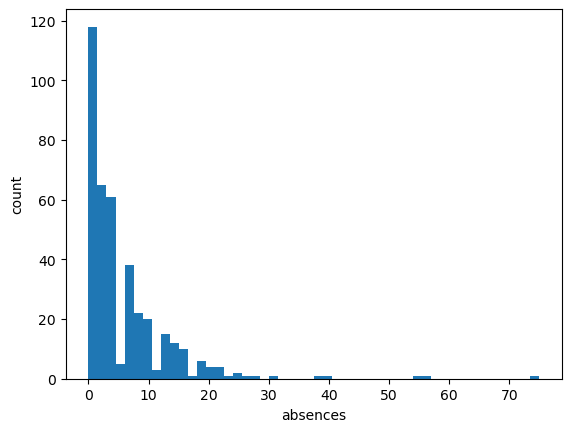

In [21]:
import matplotlib.pyplot as plt

plt.hist(df['absences'], bins = 50)
plt.xlabel('absences')
plt.ylabel('count')

plt.show()

In [22]:
# 중심경향: 평균, 중앙값, 최빈값

print('평균', round(df['absences'].mean(),2))

print('중앙값', df['absences'].median())

print('최빈값', df['absences'].mode())

#일반적으로 right skewed된 경우 평균이 중앙값보다 크게 나타남

평균 5.71
중앙값 4.0
최빈값 0    0
Name: absences, dtype: int64


In [23]:
# 분산과 표준편차

print('variance', df['absences'].var(ddof=0))

print('variance', df['absences'].std(ddof=0))
# ddof (delta degree of freedom, 모분산일 경우 0, 표본분산일 경우 1)

variance 63.88738984137152
variance 7.992958766400057


In [24]:
# 분위수 (pecentile)

df['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [25]:
# interquartile range (3분위 수와 1분위 수의 간격)

df['absences'].describe()[6] - df['absences'].describe()[4]

8.0

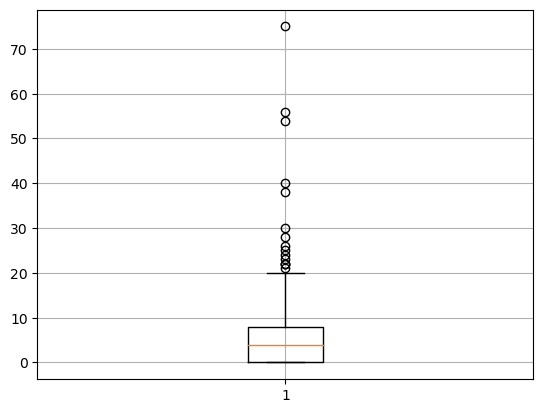

In [27]:
import matplotlib.pyplot as plt

plt.boxplot(df['absences'])
plt.grid(True)
plt.show()

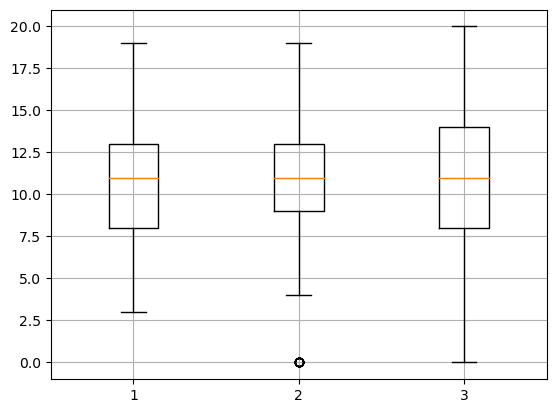

In [29]:
# 참고

plt.boxplot([df['G1'], df['G2'], df['G3']])
plt.grid()
plt.show()

## 산포도와 상관계수

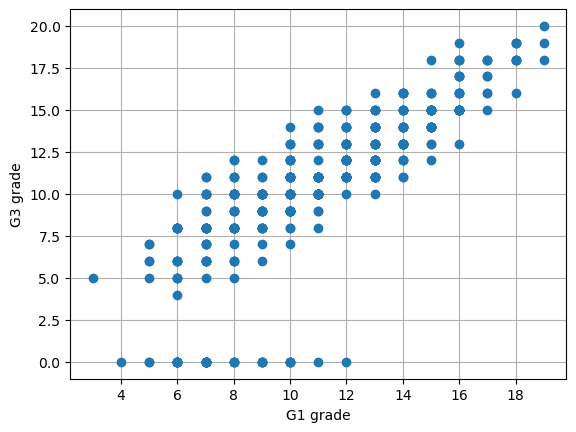

In [32]:
plt.plot(df['G1'], df['G3'], 'o')
plt.xlabel("G1 grade")
plt.ylabel("G3 grade")
plt.grid()
plt.show()

In [33]:
# 공분산 행렬: covariance matrix

np.cov(df['G1'], df['G3'], ddof=0)

# 12.15는 G1과 G3의 공분산
# 10.98은 G1의 분산
# 20.93은 G3의 분산

array([[10.98916199, 12.15682743],
       [12.15682743, 20.93647813]])

In [42]:
# 예제 : 키와 몸무게

height = pd.Series([175, 180, 168, 178, 170])

weight = pd.Series([73, 78, 70, 69, 80])

print(height.mean())
print(weight.mean())


cov_height_weight = (1/5)*(np.matmul((height - height.mean()), (weight -weight.mean())))

print('공분산 수동계산', cov_height_weight)

print('height의 분산', height.var(ddof=0))

print('weight의 분산', weight.var(ddof=0))

174.2
74.0
공분산 수동계산 0.6000000000000001
height의 분산 20.96
weight의 분산 18.8


In [38]:
np.cov(height, weight, ddof=0)

array([[20.96,  0.6 ],
       [ 0.6 , 18.8 ]])

In [43]:
# 상관계수
# 공분산을 각각의 변수의 표준편차로 나눠준 값

import scipy as sp

sp.stats.pearsonr(df['G1'], df['G3'])

PearsonRResult(statistic=0.8014679320174132, pvalue=9.001430312283913e-90)

In [45]:
# correlation matrix

np.corrcoef(df['G1'], df['G3'])

array([[1.        , 0.80146793],
       [0.80146793, 1.        ]])

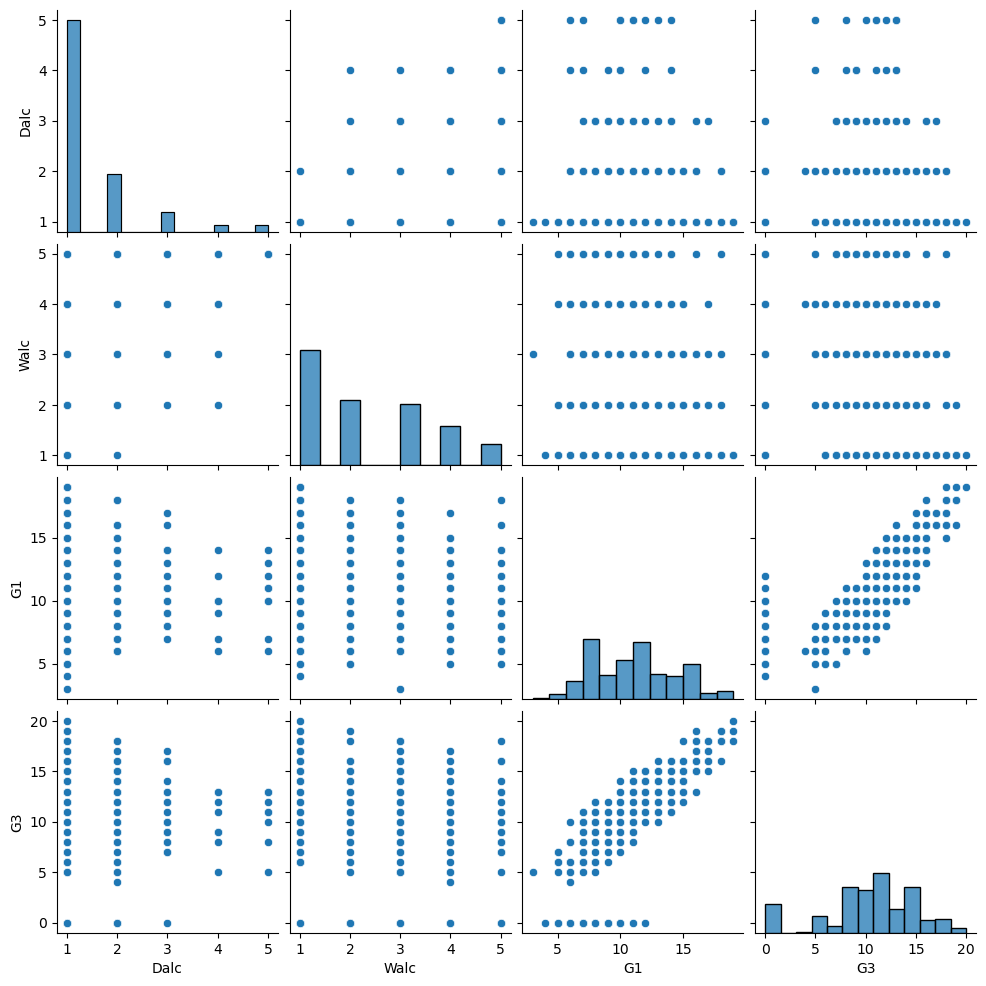

In [46]:
# 여러개의 변수들의 관계를 하나의 표로 나타내면...

import seaborn as sns

sns.pairplot(df[['Dalc', 'Walc', 'G1', 'G3']])

## simple linear regression

In [58]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

#데이터프레임과 같은 2차원데이터로 넣어줘야 함을 주의

X = df[['G1']].values
Y = df['G3'].values

reg.fit(X, Y)

print("계수", reg.coef_)
print('절편', reg.intercept_)

계수 [1.10625609]
절편 -1.6528038288004474


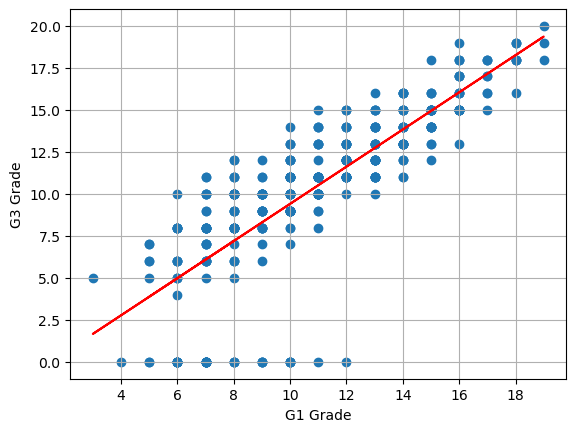

In [59]:
plt.scatter(X,Y)
plt.xlabel("G1 Grade")
plt.ylabel('G3 Grade')

plt.plot(X, reg.predict(X), color ='red')
plt.grid(True)

In [56]:
# R square : 결정 계수

print("R square", reg.score(X,Y))

R square 0.6423508460522701
